<a href="https://colab.research.google.com/github/SYSHIL/18CSE301J-Projects/blob/main/Multiclass_Hate_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import model_evaluation_utils as meu

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=9869abd441c073f26e5c55dbb59ed5f938bfc38cd0655d9631f1dabe069950a3
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords


In [ ]:
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
STOPWORDSS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [20]:
df=pd.read_excel(r'/content/drive/MyDrive/hatedetectionwithnetworkanalysis/NCCS_Dataset_english.xlsx')
df['Text'].isnull().sum()
df=df.dropna() # deleting the empty not available columns
print(df.dropna().index)
df.isnull().sum()
print(df.head())

#df=df[~df["Text"].str.contains(r'[0-9]', na=False)]
len(df)

21

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            27432, 27433, 27434, 27435, 27436, 27437, 27438, 27439, 27440,
            27441],
           dtype='int64', length=27421)


Label    0
Text     0
dtype: int64

       Label                                               Text
0  Offensive  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
1  Offensive  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
2  Offensive  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
3  Offensive  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
4  Offensive  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...


27421

In [21]:
df.Text

0        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
1        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
2        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
3        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
4        !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
                               ...                        
27437    John, This guy has been trying to get in touch...
27438    October 2001 Vol. 53 [IMAGE] [IMAGE] [IMAGE] [...
27439    The report named: NG - PROPT P/L published as ...
27440    Here is the EOL information Dutch -----Origina...
27441    The report named: NG - Price P/L published as ...
Name: Text, Length: 27421, dtype: object

In [22]:
df['Label']

0        Offensive
1        Offensive
2        Offensive
3        Offensive
4        Offensive
           ...    
27437       Normal
27438       Normal
27439       Normal
27440       Normal
27441       Normal
Name: Label, Length: 27421, dtype: object

In [23]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

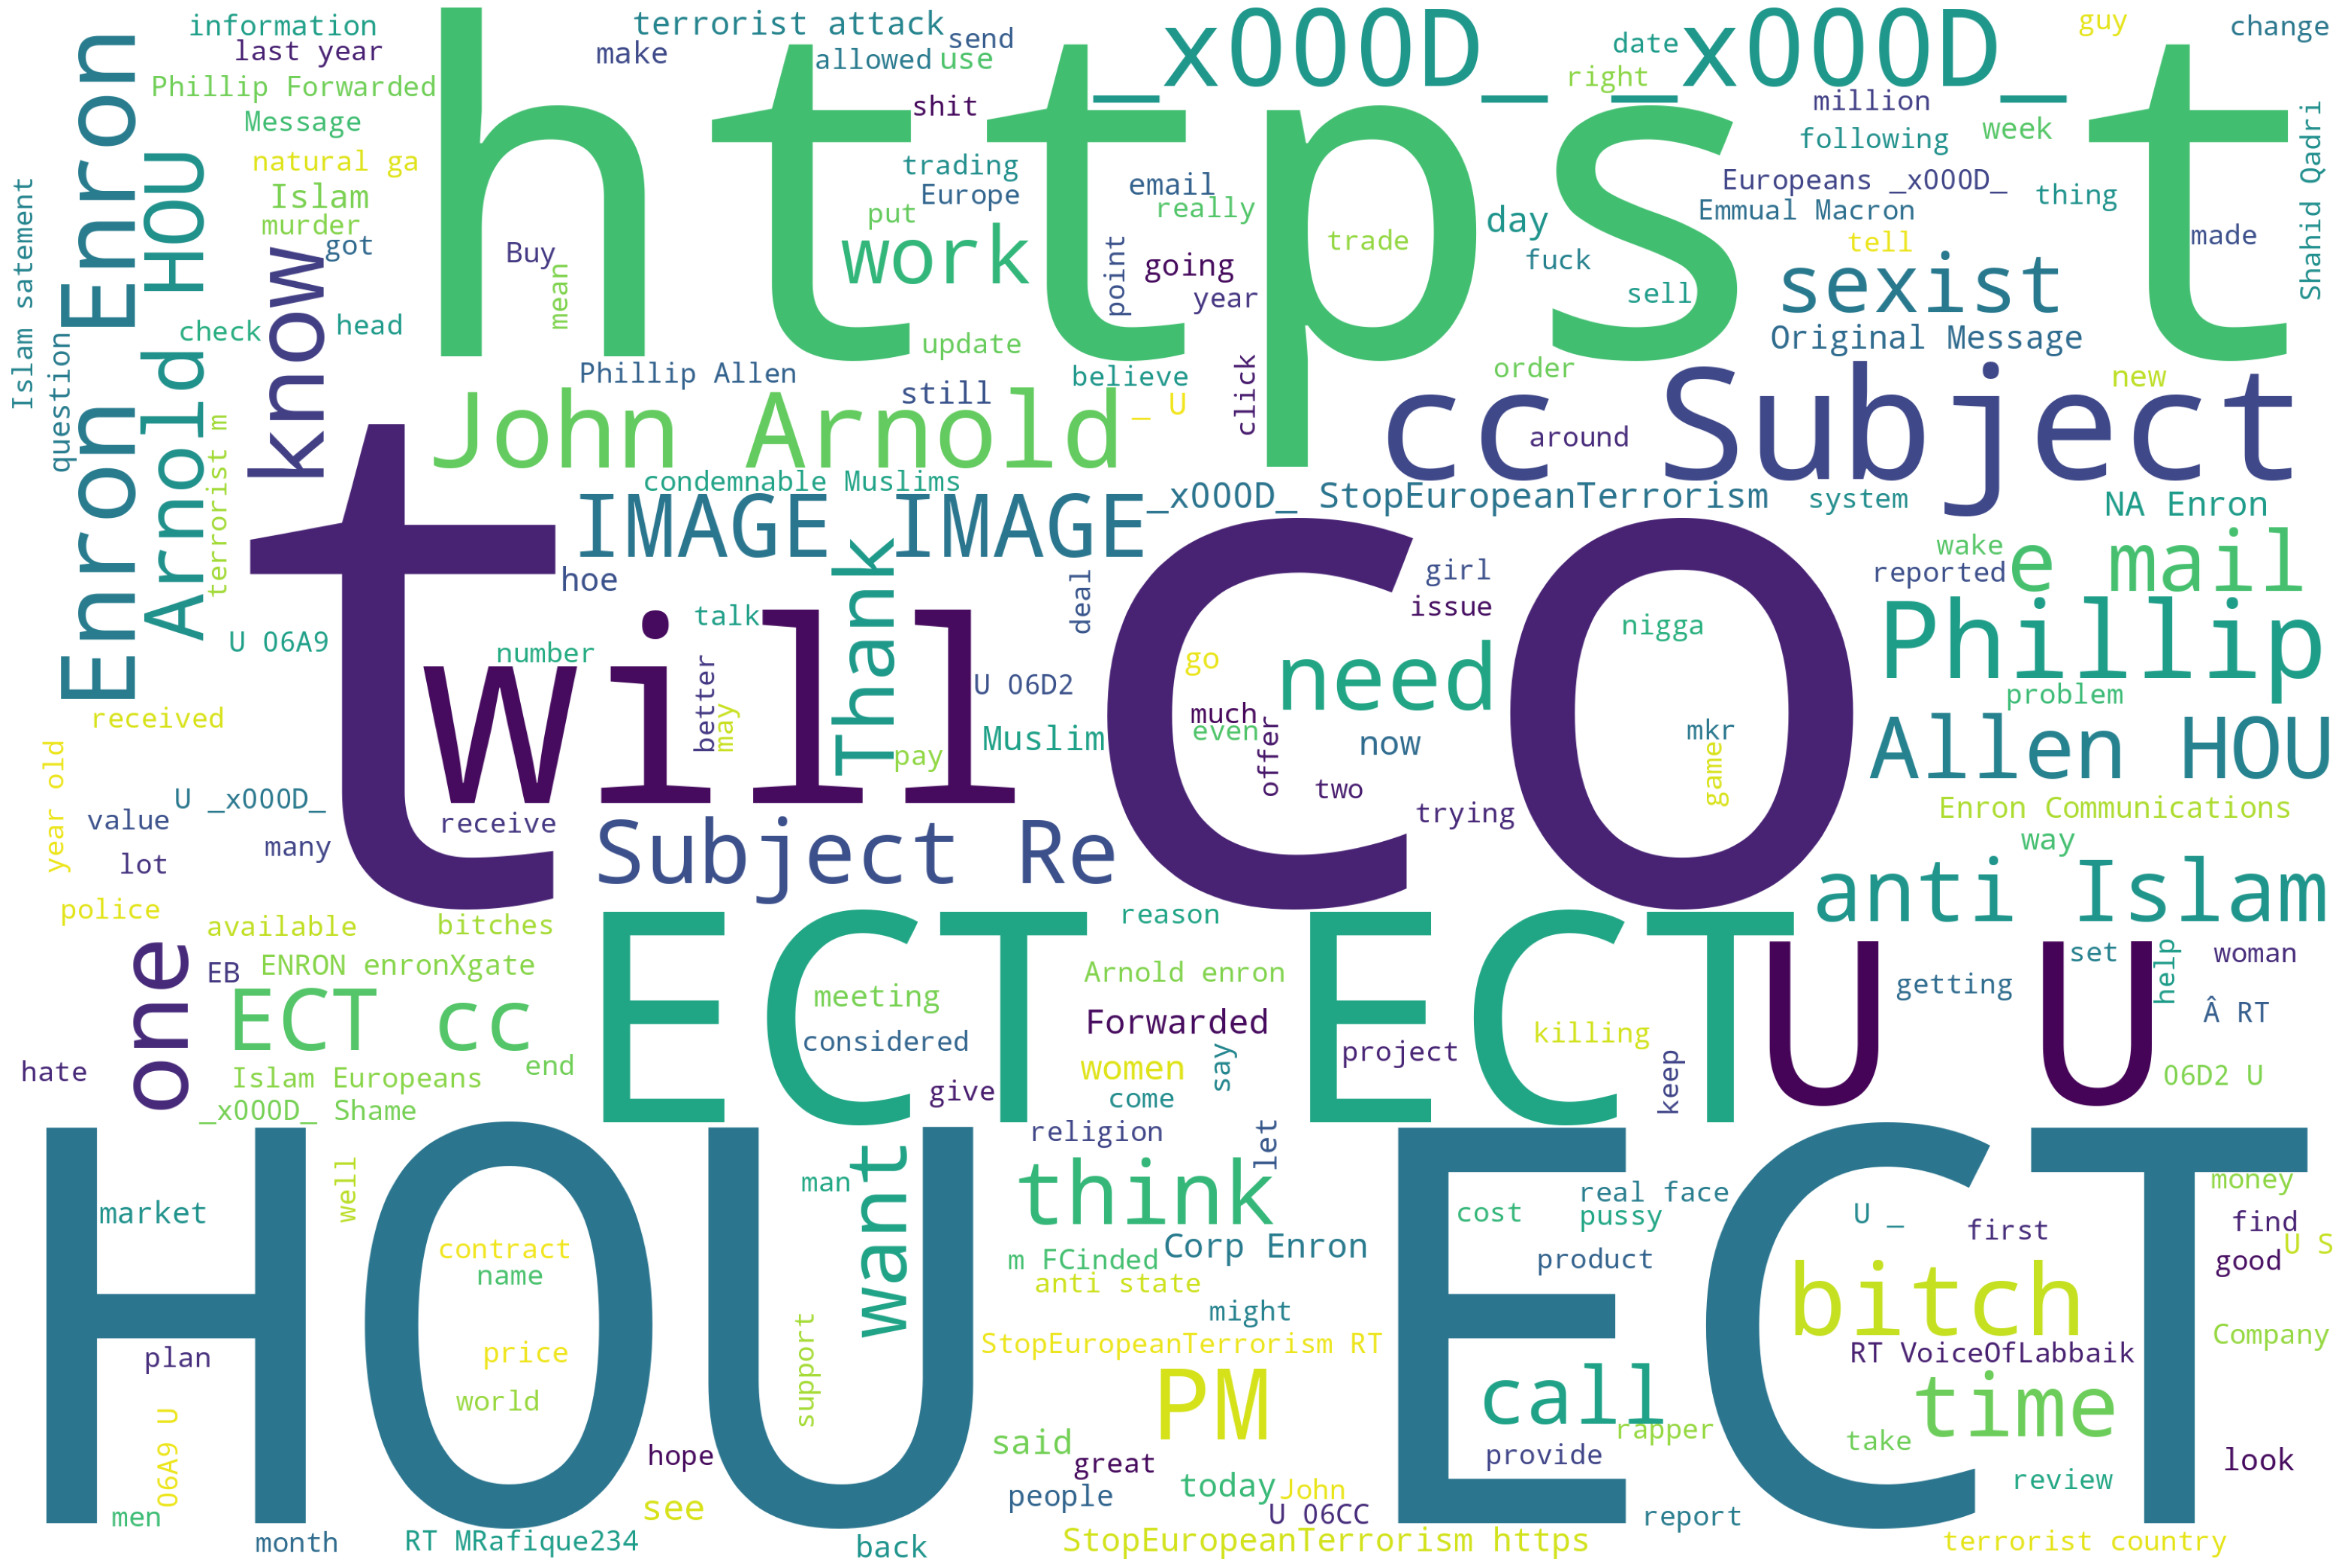

In [24]:
# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white').generate(' '.join(df.Text.astype("str")))
# Plot
plot_cloud(wordcloud)


<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Class Frequency')

Text(0.5, 0, 'Classes')

Text(0, 0.5, 'Frequency')

<Axes: title={'center': 'Class Frequency'}, xlabel='Classes', ylabel='Frequency'>

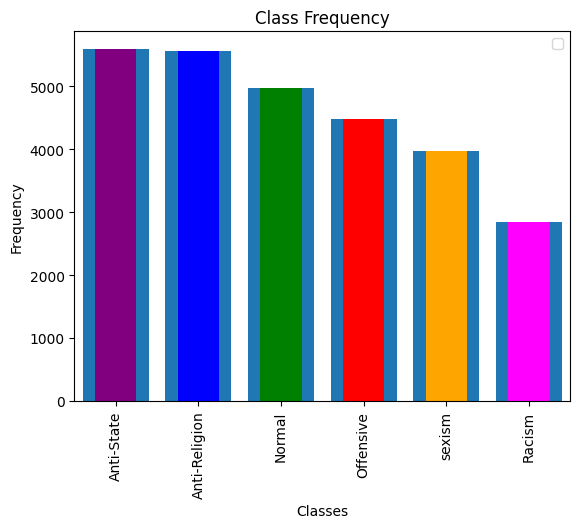

In [25]:
fig, ax = plt.subplots()
# count the occurrence of each class
data = df['Label'].value_counts()
# get x and y data
points = data.index
frequency = data.values
# create bar chart
ax.bar(points, frequency)
# set title and labels
ax.set_title('Class Frequency')
ax.set_xlabel('Classes')
ax.set_ylabel('Frequency')
ax.legend()

df['Label'].value_counts().plot.bar(color=['purple', 'blue', 'green', 'red', 'orange', 'magenta'])

plt.savefig("/content/drive/MyDrive/hatedetectionwithnetworkanalysis/barchart_class.png", dpi=700, bbox_inches="tight")


In [26]:
from sklearn.utils import shuffle
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)

In [27]:
df['Text'].head()

19015    RT @dashingdrewster: i guess i need to get in ...
24181    ---------------------- Forwarded by Phillip K ...
19216    RT @SoniaPoulton: In last 2+ years IÂ’ve lost ...
3167                    @MizzCreme what that pussy do tho?
10424    RT @one_pak_: #Payback1971Begins_x000D_\nPakis...
Name: Text, dtype: object

In [28]:
df.Label.value_counts()

Anti-State       5591
Anti-Religion    5565
Normal           4979
Offensive        4476
sexism           3972
Racism           2838
Name: Label, dtype: int64

In [29]:
df.Label.value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of tweets',
                                                                title='Number of tweets in each category')

In [30]:
df.Label.head()

19015    Anti-State
24181        Normal
19216    Anti-State
3167      Offensive
10424    Anti-State
Name: Label, dtype: object

In [31]:
pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 7.9 MB/s eta 0:00:00


In [32]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:
#text preprocessing


import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
import emoji
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Function to remove the stopwords
nltk.download('stopwords')


df = df.reset_index(drop=True)
# pre-processing code
def clean_text(text,replace=''):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = emoji.demojize(str(text))
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation characters
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"http\S+", "", text)  # removes URL from string
    text = text.replace('rt', '').replace('pm', '').replace('xd', '').replace('subject', '').replace('phillip', '')

    text = ' '.join(filter(lambda x: lemmatizer.lemmatize(x, pos ="a") not in stop_words, text.split()))
    text = " ".join(re.split("\s+", text, flags=re.UNICODE))
    return text

# apply pre-processing on sentences
df['Text'] = df['Text'].apply(clean_text)
df['Text'] = df['Text'].replace('', np.nan)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['Text'].head()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<Figure size 2000x1000 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

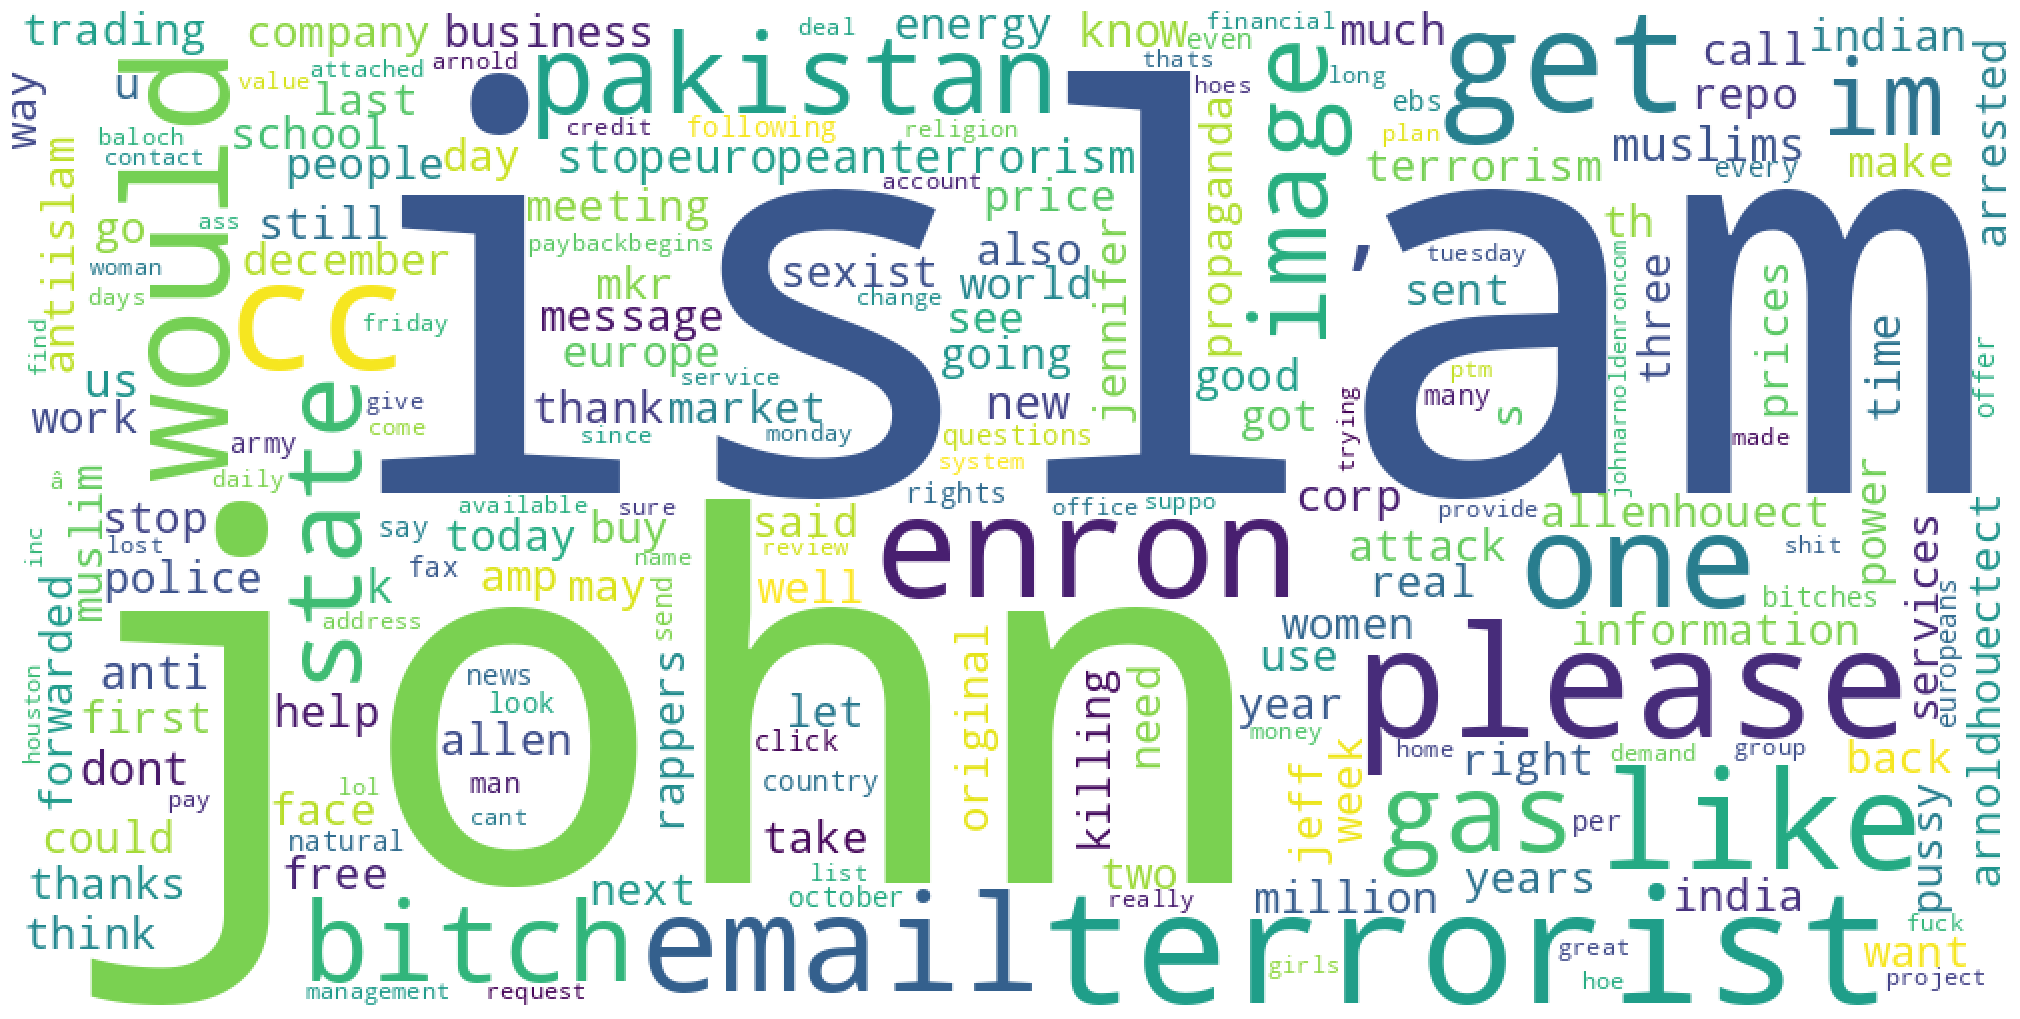

In [ ]:
# Import package
from wordcloud import WordCloud
sentences = ' '.join(df["Text"])
tokens = word_tokenize(sentences)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(frequency_dist)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig("/content/drive/MyDrive/hatedetectionwithnetworkanalysis/pre-processd_data.png", dpi=700)
plt.show()


In [ ]:
#LSTM Modeling
#Vectorize consumer complaints text, by turning each text into either a sequence of integers or into a vector.
#Limit the data set to the top 5,0000 words.
#Set the max number of words in each complaint at 250.

In [34]:
# The maximum number of words to be used. (most frequent)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
MAX_NB_WORDS = 50000
# Max number of words in each TWEET.
MAX_SEQUENCE_LENGTH = 170
# This is fixed.
EMBEDDING_DIM = 170
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 45962 unique tokens.


In [35]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (27406, 170)


In [36]:
#Converting categorical labels to numbers.
#Offensive= '3'
#Anti-State= '1'
#Anti-Religion= '0'
#Normal='2'
#Racism= '4'
#sexism='5'

Y = pd.get_dummies(df['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (27406, 6)


In [37]:
#Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(19184, 170) (19184, 6)
(8222, 170) (8222, 6)


In [38]:
print(Y_test)

[[0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 ...
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]]


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras import regularizers

modelL = Sequential()
modelL.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))

# Bidirectional LSTM layers
modelL.add(Bidirectional(LSTM(128, return_sequences=True)))
modelL.add(Bidirectional(LSTM(128, return_sequences=False)))

modelL.add(Dense(units=64, activation="relu"))
modelL.add(Dense(units=28, activation="relu", kernel_regularizer=regularizers.l2(0.00000001)))
modelL.add(Dense(6, activation='softmax'))

modelL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 200
batch_size = 256

historyL = modelL.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.10)

Epoch 1/200
68/68 [==============================] - 26s 257ms/step - loss: 0.9376 - accuracy: 0.6514 - val_loss: 0.3464 - val_accuracy: 0.8796
Epoch 2/200
68/68 [==============================] - 15s 223ms/step - loss: 0.1526 - accuracy: 0.9520 - val_loss: 0.2373 - val_accuracy: 0.9286
Epoch 3/200
68/68 [==============================] - 14s 208ms/step - loss: 0.0350 - accuracy: 0.9907 - val_loss: 0.2369 - val_accuracy: 0.9375
Epoch 4/200
68/68 [==============================] - 13s 195ms/step - loss: 0.0100 - accuracy: 0.9983 - val_loss: 0.2908 - val_accuracy: 0.9302
Epoch 5/200
68/68 [==============================] - 12s 182ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.2982 - val_accuracy: 0.9375
Epoch 6/200
68/68 [==============================] - 13s 197ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.3021 - val_accuracy: 0.9343
Epoch 7/200
68/68 [==============================] - 11s 165ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.3536 - val_accuracy:

In [ ]:
modelL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 170, 170)          8500000   
                                                                 
 bidirectional (Bidirection  (None, 170, 256)          306176    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 28)                1820      
                                                                 
 dense_2 (Dense)             (None, 6)                 1

In [ ]:
accr_modelL = modelL.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_modelL[0],accr_modelL[1]))

257/257 [==============================] - 3s 12ms/step - loss: 0.4113 - accuracy: 0.9514
Test set
  Loss: 0.411
  Accuracy: 0.951


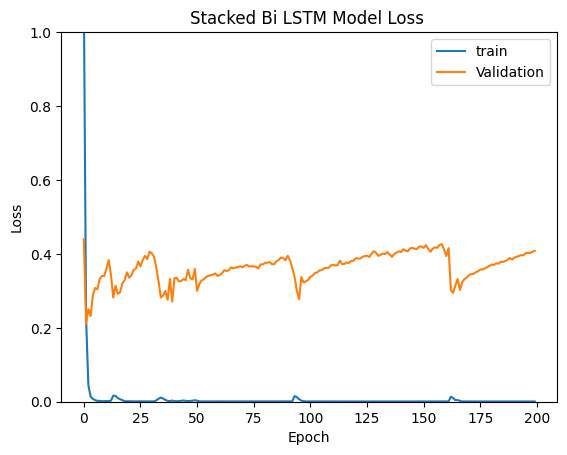

In [ ]:
import matplotlib.pyplot as plt
plt.title('Stacked Bi LSTM Model Loss ')
plt.plot(historyL.history['loss'], label='train')
plt.plot(historyL.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('/content/drive/MyDrive/hatedetectionwithnetworkanalysis/Loss.png', dpi=300, bbox_inches='tight')
plt.show();

NameError: name 'historyL' is not defined

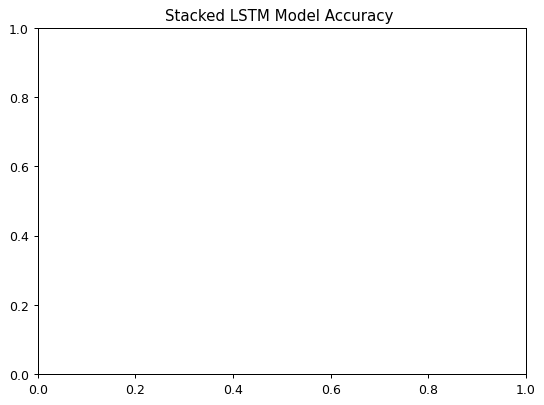

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Stacked LSTM Model Accuracy ')
plt.plot(historyL.history['accuracy'], label='train')
plt.plot(historyL.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
model_json = modelL.to_json()
with open("/content/drive/MyDrive/hatedetectionwithnetworkanalysis/BILSTM_MODEL.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelL.save_weights("/content/drive/MyDrive/hatedetectionwithnetworkanalysis/BILSTM_MODEL.h5")
print("Saved model to disk")

5525

Saved model to disk


In [39]:
# load json and create model
from keras.models import model_from_json
import os
json_file = open('/content/drive/MyDrive/hatedetectionwithnetworkanalysis/BILSTM_MODEL.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/hatedetectionwithnetworkanalysis/BILSTM_MODEL.h5")
print("Loaded model from disk")
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score=loaded_model.evaluate(X_train, Y_train, verbose=0)

Loaded model from disk


In [47]:
#Test with a New tweet
new_complaint = ['indian people are stupid']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = modelL.predict(padded)
pred= loaded_model.predict(padded)
labels = ["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive" ]
print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

1/1 [==============================] - 0s 38ms/step
[[3.24304290e-02 9.59408760e-01 7.61773717e-03 4.18976560e-04
  1.82343083e-05 1.05812396e-04]] Anti-State
Anti-State


In [ ]:
#predict using the saved model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
y_pred=modelL.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
tests=np.argmax(Y_test, axis=1) # write the Y_test in place of Y_train convert the decimal points to rounded
print(y_pred)

257/257 [==============================] - 4s 14ms/step
[1 2 4 ... 5 0 2]


In [ ]:
#confusion Matrix to LSTM-Classifier
#y_pred=model.predict_classes(X_test) # predict_classes used the round variable values instead of points
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
tests=np.argmax(Y_test, axis=1) # write the Y_test in place of Y_train convert the decimal points to rounded
# we provide the confusion matrix a rounded value otherwise a classification matrix problem arieses
cm=confusion_matrix(y_pred, tests)
print(cm)

pd_cm=pd.DataFrame(cm)

print('Accuracy Score :',accuracy_score(tests, y_pred))
print('Report : ')
print(classification_report(tests, y_pred))
print(pd_cm)


[[1537   43    4    0   68    9]
 [  25 1607    1    6    6    6]
 [   5    7 1507   14    4   19]
 [   4    8    5 1311    7   24]
 [  33   14    0    5  794   19]
 [   6   13    7   18   20 1066]]
Accuracy Score : 0.9513500364874726
Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1610
           1       0.97      0.95      0.96      1692
           2       0.97      0.99      0.98      1524
           3       0.96      0.97      0.97      1354
           4       0.92      0.88      0.90       899
           5       0.94      0.93      0.94      1143

    accuracy                           0.95      8222
   macro avg       0.95      0.95      0.95      8222
weighted avg       0.95      0.95      0.95      8222

      0     1     2     3    4     5
0  1537    43     4     0   68     9
1    25  1607     1     6    6     6
2     5     7  1507    14    4    19
3     4     8     5  1311    7    24
4    33    14     0     5  

,Precision,Recall,F1-Score,Support
Anti-Religion,0.925346,0.954658,0.939774,1610.0
Anti-State,0.973349,0.949764,0.961412,1692.0
Neutral,0.968509,0.988845,0.978571,1524.0
Racism,0.964680,0.968242,0.966458,1354.0
Sexism,0.917919,0.883204,0.900227,899.0
Offensive,0.943363,0.932633,0.937967,1143.0


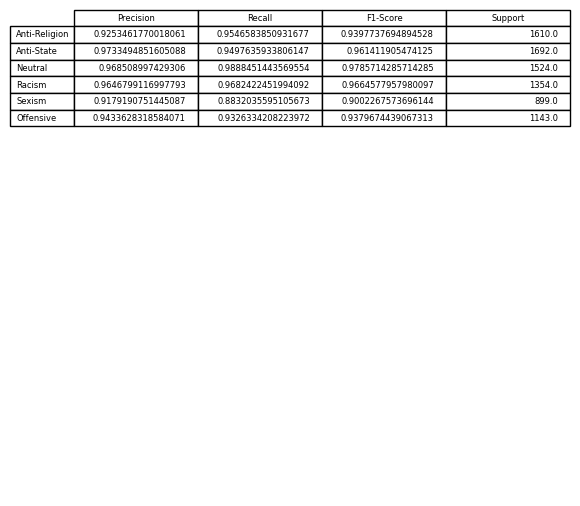

In [ ]:
#printing classification report
report = classification_report(tests, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.index=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive","accuracy","macro avg","weighted avg"]
df_report.columns=["Precision", "Recall", "F1-Score", "Support"]
df_report[0:6]
#saving the classification report as a png
from pandas.plotting import table # EDIT: see deprecation warnings below
ax = plt.subplot(frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_report[0:6],loc='top')  # where df is your data frame

plt.savefig('/content/drive/MyDrive/hatedetectionwithnetworkanalysis/Classification_report.png', dpi=300,bbox_inches='tight')

<Axes: >

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.72222222222221, 0.5, 'Actual')

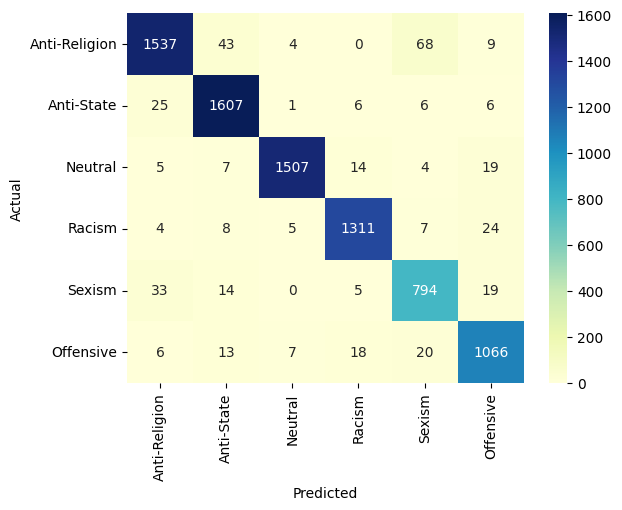

In [ ]:
#confusion matrix by seaborn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    tests,
        'y_Predicted': y_pred,
        }

# df = pd.DataFrame(data, columns=['y_Actual','y_Predicted', 'Lables'])
# df.head()
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],rownames=['Actual'],colnames=['Predicted'])
# confusion_matrix
# sn.heatmap(confusion_matrix, annot=True,fmt="d", cmap="YlGnBu")
# plt.savefig('save_as_a_png.png', dpi=400)


pd_cm.columns=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive"]
pd_cm.index=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive"]
sn.heatmap(pd_cm, annot=True,fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.savefig("/content/drive/MyDrive/hatedetectionwithnetworkanalysis/stacked_lstm(94).png" ,dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
### EVERYTHING AFTER THIS IS NOT NEEDED BUT PLEASE DONT DELETE

In [ ]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dense(units=128, activation="relu",kernel_regularizer=regularizers.l2(0.00000001)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(units=64, activation="relu"))#,recurrent_dropout=0.15
model.add(Dense(units=28, activation="relu",kernel_regularizer=regularizers.l2(0.00000001)))#,
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 200
batch_size = 256

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)#,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001])

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Stacked LSTM Model Accuracy ')
plt.plot(historyL.history['accuracy'], label='train')
plt.plot(historyL.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
accr_model = model.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model[0],accr_model[1]))

In [ ]:
import matplotlib.pyplot as plt
plt.title('Stacked LSTM Model Loss ')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Stacked LSTM Model Accuracy ')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
#different models for the implementation of the lstms versions
# 3 LSTM layers model
model_1 = Sequential()
model_1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, trainable=True, input_length = X.shape[1])) #input_length=X.shape[1] replace with the input shape, X_train.shape[1] in place of X.shape
model_1.add(LSTM(units=128, return_sequences=False))
model_1.add(Dense(16))
#model_1.add(Dropout(rate=0.25))
model_1.add(Dense(6, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

epochs = 50
batch_size = 64

history_1 = model_1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 170, 170)          8500000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               153088    
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 6)                 102       
                                                                 
Total params: 8655254 (33.02 MB)
Trainable params: 8655254 (33.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
270/270 [==============================] - 45s 157ms/step - loss: 0.5141 - accuracy: 0.8281 - val_loss: 0.1767 - val_accuracy: 0.9343
E

In [ ]:
accr_model_1 = model_1.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model_1[0],accr_model_1[1]))

In [ ]:
import matplotlib.pyplot as plt
plt.title('Single Layer LSTM Model Loss ')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Single layer LSTM Model Accuracy ')
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
# LSTM with Conv1D layer
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Activation
model_2 = Sequential()
model_2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, trainable=True, input_length = X.shape[1]))
model_2.add(Conv1D(filters=32, kernel_size=3, padding='same'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(LSTM(units=64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model_2.add(Dense(16))
model_2.add(Activation('relu'))
model_2.add(LSTM(units=64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model_2.add(Dense(16))
model_2.add(Activation('relu'))
model_2.add(LSTM(units=64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
model_2.add(Dense(16))
model_2.add(Activation('relu'))
model_2.add(Dropout(rate=0.25))
model_2.add(Dense(6, activation='softmax'))
from keras.optimizers import SGD
opt = SGD(lr=0.1)
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# optimizer='adam'
model_2.summary()


epochs = 20
batch_size = 256

history_2 = model_2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:

accr_model_2 = model_2.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model_2[0],accr_model_2[1]))

In [ ]:
import matplotlib.pyplot as plt
plt.title('CNN+LSTM Model Loss ')
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('CNN+LSTM Model Accuracy ')
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
# LSTM with GRU layer
from keras.layers import GRU

model_3 = Sequential()
model_3.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, trainable=True, input_length = X_train.shape[1]))
model_3.add(Dropout(rate=0.15))
model_3.add(LSTM(64, return_sequences=True, dropout=0.2, name="LSTM"))
model_3.add(GRU(64, return_sequences=False, dropout=0.2, name="GRU"))
model_3.add(Dense(64, name="Dense2"))
model_3.add(Dropout(rate=0.15))
model_3.add(Dense(16, name="Dense3"))
model_3.add(Dense(6, activation='softmax', name="Output"))
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.summary()

epochs = 20
batch_size = 64

history_3 = model_3.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
import matplotlib.pyplot as plt
plt.title('GRU+LSTM Model Loss ')
plt.plot(history_3.history['loss'], label='train')
plt.plot(history_3.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
top_words = 100000

x_train,x_cv,y_train,y_cv = train_test_split(X_train,Y_train,test_size = 0.2)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", x_cv.shape)

# truncate and pad input sequences
max_review_length = 150
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
x_cv = sequence.pad_sequences(x_cv,maxlen=max_review_length)

embedding_vecor_length = 100
model4 = Sequential()
model4.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model4.add(SpatialDropout1D(0.2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(6, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())
filepath="weights_best.hdf5"
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, mode='max', verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min',save_weights_only=True)
callbacks_list = [early_stop,checkpoint]
model4.fit(x_train, y_train, epochs=20, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(x_cv,y_cv))

Shape of train data: (19184, 170)
Shape of Test data: (8222, 170)
Shape of CV data: (3837, 170)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 100)          10000000  
                                                                 
 spatial_dropout1d (Spatial  (None, 150, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
Total params: 10081006 (38.46 MB)
Trainable params: 10081006 (38.46 MB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 150), found shape=(None, 170)


In [ ]:
model_json = model.to_json()
with open("/content/model_01-01-21-updated.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/model_01-01-21-updated.h5")
print("Saved model to disk")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
x_train,x_cv,y_train,y_cv = train_test_split(X,Y,test_size = 0.3)
embedding_vecor_length = 32
model5 = Sequential()
model5.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(GRU(64, return_sequences=True, dropout=0.2, name="GRU"))
model5.add(LSTM(100))
model5.add(Dense(6, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model5.summary())
filepath="weights_best_cnn.hdf5"
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, mode='min', verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', patience=100 ,verbose=1, save_best_only=True, mode='min',save_weights_only=True)
callbacks_list = [early_stop,checkpoint]
history_5=model5.fit(x_train, y_train, epochs=200, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(x_cv,y_cv))

In [ ]:
# Final evaluation of the model
# create the model
# embedding_vecor_length = 32
# model5 = Sequential()
# model5.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
# model5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model5.add(MaxPooling1D(pool_size=2))
# model5.add(LSTM(100))
# model5.add(Dense(6, activation='softmax'))
# model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model5.summary())
# model5.load_weights("/content/weights_best.hdf5")
scores = model5.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]))

In [ ]:
new_complaint = ['Special Assistant to the Prime Minister on National Health Services, Regulations & Coordination; Infectious Diseases Physician']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=max_review_length)
pred = modelL.predict(padded)
labels = ["Anti-Religion","Anti-State", "Normal", "Offensive", "Racism", "sexism"]
#Offensive= '3'
#Anti-State= '1'
#Anti-Religion= '0'
#Normal='2'
#Racism= '4'
#sexism='5'
#print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

NameError: name 'max_review_length' is not defined

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Model', 'Accuracy']
table.add_row(['LSTM', 93.99])
table.add_row(['CNN using LSTM', 94.32])
print(table)

In [ ]:
accr = model5.evaluate(X_test,Y_test)
#save keras model
model.save("English_hate_detection.h5")
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
new_complaint = ['']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['0', '1', '2', '3','4', '5']
#print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

In [ ]:
plt.title('LSTM+GRU Model Accuracy')
plt.figure(figsize=(7, 5), dpi=90)
plt.plot(history_5.history['accuracy'], label='train',marker='o', markerfacecolor='white', markersize=10, color='green', linewidth=2)
plt.plot(history_5.history['val_accuracy'], label='Validation',marker='*', markerfacecolor='white', markersize=10, color='purple', linewidth=2)

axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,1])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("Accuracy_lstmgrucheck.png", dpi=90)
plt.show()

In [ ]:
plt.title('LSTM+GRU Model Loss')
plt.plot(history_5.history['loss'], label='train',marker='o', markerfacecolor='white', markersize=10, color='skyblue', linewidth=2)
plt.plot(history_5.history['val_loss'], label='Validation',marker='*', markerfacecolor='white', markersize=10, color='purple', linewidth=2)
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,1])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Loss_lstmgrucheckpoints.png")
plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/pretrained_model/nouman_model_26_01_21.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/pretrained_model/nouman_model_26_01_21.h5")
print("Saved model to disk")

In [ ]:
import pickle

#save:
# f = open('/content/pretrained_model/history.pckl', 'wb')
# pickle.dump(history.history, f)
# f.close()

# retrieve:
f = open('/content/history.pckl', 'rb')
saved_history = pickle.load(f)
f.close()


In [ ]:
import matplotlib.pyplot as plt
plt.title('Model Loss')
plt.plot(saved_history['loss'], label='train')
plt.plot(saved_history['val_loss'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches= 'tight')
plt.show();

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Model Accuracy')
plt.plot(saved_history['accuracy'], label='train')
plt.plot(saved_history['val_accuracy'], label='validation')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches= 'tight')
plt.show();
plt.close()

In [ ]:
#plot history of trained model using the pickle file
import matplotlib.pyplot as plt
w = 7
h = 5
d = 300
plt.figure(figsize=(w, h), dpi=d)
plt.title('Model Loss')
loss = saved_history['loss']
val_loss = saved_history['val_loss']
plt.plot(loss, label='train')
plt.plot(val_loss, label='test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig("Model_Loss.png")
plt.close()

In [ ]:
#load saved model as keras
from keras.models import load_model
keras_saved_model = load_model("/content/drive/My Drive/Colab Notebooks/Model_Weights_7_04-26-20/model.json")
Keras_score = keras_saved_model.evaluate(X_train, Y_train, verbose=0)
print("%s: %.2f%%" % (keras_saved_model.metrics_names[1], score[1]*100))

In [ ]:
# load json and create model
from keras.models import model_from_json
import os
json_file = open('/content/model_01-01-21-updated.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights("/content/model_01-01-21-updated.h5")
print("Loaded model from disk")
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score=loaded_model.evaluate(X_train, Y_train, verbose=0)

In [ ]:
accr_by_loaded=loaded_model.evaluate(X_test,Y_test)
accr_by_loaded

In [ ]:
#predict using the saved model
y_pred=model.predict_classes(X_test)#X_test in place of X_train

In [ ]:
#confusion Matrix to LSTM-Classifier
#y_pred=model.predict_classes(X_test) # predict_classes used the round variable values instead of points
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
tests=np.argmax(Y_test, axis=1) # write the Y_test in place of Y_train convert the decimal points to rounded
# we provide the confusion matrix a rounded value otherwise a classification matrix problem arieses
cm=confusion_matrix(y_pred, tests)
print(cm)

pd_cm=pd.DataFrame(cm)

print('Accuracy Score :',accuracy_score(tests, y_pred))
print('Report : ')
print(classification_report(tests, y_pred))
print(pd_cm)



In [ ]:
#printing classification report
report = classification_report(tests, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.index=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive","accuracy","macro avg","weighted avg"]
df_report.columns=["Precision", "Recall", "F1-Score", "Support"]
df_report[0:6]
#saving the classification report as a png
from pandas.plotting import table # EDIT: see deprecation warnings below
ax = plt.subplot(frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_report[0:6],loc='top')  # where df is your data frame

plt.savefig('Classification_report.png', dpi=300,bbox_inches='tight')

In [ ]:
#confusion matrix by seaborn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    tests,
        'y_Predicted': y_pred,
        }

# df = pd.DataFrame(data, columns=['y_Actual','y_Predicted', 'Lables'])
# df.head()
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],rownames=['Actual'],colnames=['Predicted'])
# confusion_matrix
# sn.heatmap(confusion_matrix, annot=True,fmt="d", cmap="YlGnBu")
# plt.savefig('save_as_a_png.png', dpi=400)


pd_cm.columns=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive"]
pd_cm.index=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive"]
sn.heatmap(pd_cm, annot=True,fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.savefig("stacked_lstm(94).png" ,dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
my_categories=["Anti-Religion","Anti-State", "Neutral", "Offensive",  "Racism", "Sexism"]

In [ ]:
meu.plot_model_roc_curve(model_2, X_test, Y_test, class_names=my_categories)
plt.savefig('/content/Simple_LSTM_ROC.png', dpi=400, bbox_inches="tight")
plt.show()

In [ ]:
meu.plot_model_roc_curve(model_2, X_test, Y_test, class_names=my_categories)
plt.savefig('/content/Simple_LSTM_ROC.png', dpi=400, bbox_inches="tight")
plt.show()

In [ ]:
#Test with a New tweet
new_complaint = ['you bloody bitch ']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
pred= loaded_model.predict(padded)
labels = ["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive" ]
print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])